# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [159]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import copy

In [160]:
party_data = []
people_data = []

years = [2018, 2014, 2010, 2006]

for year in years:
    '''
        reads data from volby.cz 
    '''
    url = 'https://www.volby.cz/pls/kv' + str(year) + '/kv1111?xjazyk=CZ&xid=1&xdz=3&xnumnuts=5103&xobec=563889&xstat=0&xvyber=0'
    dfs = pd.read_html(url,flavor='html5lib')
    dfs[1].columns = dfs[1].columns.to_frame()[1]
    dfs[1]["Rok"] = np.full(len(dfs[1]), year)
    party_data.append(dfs[1])
    url = 'https://www.volby.cz/pls/kv' + str(year) + '/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5103&xobec=563889&xstrana=0'
    dfs = pd.read_html(url,flavor='html5lib')
    dfs[0].columns = dfs[0].columns.to_frame()[1]
    dfs[0]["Rok"] = np.full(len(dfs[0]), year)
    people_data.append(dfs[0])
    
# reads party data for year 2002
url = 'http://www.volby.cz/pls/kv2002/kv1211?xjazyk=CZ&xid=1&xv=1&xdz=3&xnumnuts=5103'
party_data_2002 = pd.read_html(url, displayed_only=False)

# reads people data for year 2002
url = 'http://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5103&xobec=563889&xstrana=0'
people_data_2002 = pd.read_html(url, displayed_only=False)
people_data_2002[0].columns = people_data_2002[0].columns.to_frame()[1]
people_data_2002[0]["Rok"] = np.full(len(people_data_2002[0]), 2002)

In [161]:
# Řešení titulů pro roky 2006 - 2018
# Rozpoznávaé tituly
titles = ["Bc.", "BcA.", "Ing.", "Ing. arch.", "MUDr.", "MVDr.", "Mgr.", "MgA.", "JUDr.", "PhDr.", "RNDr.", "PharmDr.", "ThLic.", "ThDr.", "Ph.D.", "Ph.D.", "Th.D.", "CSc.", "DrSc.", "doc.", "prof."]

for df in people_data:
    title_frame = []
    cols = list(df)
    cols.insert(4, "Tituly")
    df["Tituly"] = np.nan
    df.columns = cols
    buffer = []
    for index, name in enumerate(cols):
        tmp = copy.deepcopy(df[name])
        if index > 4:
            df[name] = copy.deepcopy(buffer)
        buffer = copy.deepcopy(tmp)
    for index, row in df.iterrows():
        arr = row["příjmení, jméno, tituly"].split()
        title = ""
        if len(arr) < 3:
            title_frame.append("")
            continue
        for name in arr:
            if name in titles: 
                title = title + " " + name
        title_frame.append(title)
    df["Tituly"] = title_frame


In [162]:
display(people_data_2002[0].columns)
display(people_data[3].columns)

Index(['Kandidátnílistina', 'Kandidátnílistina.1', 'Poř.číslo',
       'Příjmení, jméno', 'Tituly', 'Věk', 'Navrh.strana', 'Polit.přísl.',
       'abs.', 'v %', 'Pořadí', 'Mandát', 'Rok'],
      dtype='object', name=1)

Index(['číslo', 'název', 'poř.číslo', 'příjmení, jméno, tituly', 'Tituly',
       'věk', 'Navrhujícístrana', 'Politickápříslušnost', 'abs.', 'v %',
       'Pořadízvolení/náhradníka', 'Mandát', 'Rok'],
      dtype='object')

In [163]:
display(people_data[3])
display(people_data_2002[0])

,číslo,název,poř.číslo,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
0,2,Strana zelených,5,Absolonová Kateřina MUDr.,MUDr.,40,SZ,BEZPP,4 116,321,4,*,2006
1,4,Unie pro sport a zdraví,7,Bahníková Štefania Ing.,Ing.,53,USZ,USZ,2 739,267,6,-,2006
2,4,Unie pro sport a zdraví,27,Bachtík Jan,,72,USZ,BEZPP,2 202,215,24,-,2006
3,8,SOS pro Liberec,11,Becker Ladislav,,52,CZ,CZ,6 157,259,2,-,2006
4,8,SOS pro Liberec,38,Bednaříková Olga Marie,,55,SOS,BEZPP,5 179,218,28,-,2006
5,7,Komunistická str.Čech a Moravy,29,Bělohlávek Jiří,,56,KSČM,KSČM,2 490,251,26,-,2006
6,6,Česká str.sociálně demokrat.,10,Bělochová Šárka,,23,ČSSD,ČSSD,4 255,263,4,-,2006
7,1,SNK ED a nezávislí společně,34,Benc Ivo,,42,NK,BEZPP,1 511,209,32,-,2006
8,8,SOS pro Liberec,26,Beránek Stanislav Ing.,Ing.,48,US-DEU,US-DEU,5 916,249,16,-,2006
9,2,Strana zelených,37,Bergl Václav,,60,SZ,BEZPP,2 584,201,33,-,2006


1,Kandidátnílistina,Kandidátnílistina.1,Poř.číslo,"Příjmení, jméno",Tituly,Věk,Navrh.strana,Polit.přísl.,abs.,v %,Pořadí,Mandát,Rok
0,11,Str.pro otevřenou společnost,15,Absolonová Kateřina,MUDr.,36,SOS,BEZPP,2 749,2.80,12.0,NaN,2002
1,7,Naděje,20,Adam Lubomír,NaN,33,N,BEZPP,188,2.07,NaN,NaN,2002
2,7,Naděje,2,Apltauer Jan,Ing.,27,N,BEZPP,487,5.38,NaN,NaN,2002
3,14,Unie pro sport a zdraví,3,Bahníková Štefania,Ing.,49,USZ,USZ,2 320,3.27,4.0,NaN,2002
4,14,Unie pro sport a zdraví,11,Bachtík Jan,NaN,68,USZ,USZ,1 905,2.69,9.0,NaN,2002
5,13,Pravý Blok,14,Balvirčáková Blanka,NaN,20,PB,BEZPP,105,3.65,NaN,NaN,2002
6,3,Demokratická regionální strana,27,Bartoš Jan,NaN,58,DRS,DRS,1 336,2.21,24.0,NaN,2002
7,13,Pravý Blok,12,Bartoš Petr,NaN,54,PB,BEZPP,114,3.96,NaN,NaN,2002
8,5,Křesť.demokr.unie-Čs.str.lid.,31,Bartošová Irena,Ing.,46,KDU-ČSL,KDU-ČSL,739,2.08,NaN,NaN,2002
9,13,Pravý Blok,10,Bartošová Sylvie,NaN,47,PB,BEZPP,118,4.10,NaN,NaN,2002


In [164]:
# data from 2002 append other data
people_data_2002[0].columns = people_data[0].columns
people_data.append(people_data_2002[0])

In [165]:
party_data_2002[0].columns = party_data_2002[0].columns.to_frame()[1]
party_data_2002[1].columns = party_data_2002[1].columns.to_frame()[1]
party_data_2002[1]["Rok"] = np.full(len(party_data_2002[1]), 2002)

In [166]:
for index, df in enumerate(party_data): 
    party_data[index] = party_data[index].drop(columns = ["číslo", "Početkandidátů", "Přepočtenýzákladdle počtukandidátů", "Podílyhlasů"])

In [167]:
display(party_data_2002[1].columns)
display(party_data[0].columns)

Index(['Volební strana', 'abs.', 'v %', 'abs.', 'v %', 'Rok'], dtype='object', name=1)

Index(['název', 'abs.', 'v %', 'Přepočtené %platných hlasů', 'Početmandátů',
       'Rok'],
      dtype='object', name=1)

In [168]:
party_data_2002[1].columns = party_data[0].columns
party_data_2002[1].columns

party_data_2002[1]['Přepočtené %platných hlasů'], party_data_2002[1]['Početmandátů'] = party_data_2002[1]['Početmandátů'], party_data_2002[1]['Přepočtené %platných hlasů']
party_data_2002[1]['Přepočtené %platných hlasů'] = np.nan
party_data.append(party_data_2002[1])

In [171]:
party_result = pd.concat(party_data)
party_result = party_result.replace(regex=[r'Komunistická str.Čech a Moravy'], value='Komunistická strana Čech a Moravy')
party_result = party_result.replace(regex=[r'Česká str.sociálně demokrat.'], value='Česká strana sociálně demokratická')
party_result = party_result.drop(columns = ["Přepočtené %platných hlasů"])
party_result.groupby(["název"]).size()

název
ANO 2011                                                                                                                    2
Demokratická regionální strana                                                                                              2
Hnutí nezávislých za harmonický rozvoj obcí a měst                                                                          1
KDU-ČSL a nezávislí                                                                                                         1
Komunistická strana Čech a Moravy                                                                                           5
Koruna Česká (monarch.strana)                                                                                               1
Křesťanská a demokratická unie - Československá strana lidová                                                               1
Liberec Plus+                                                                                                   

In [172]:
people_result = pd.concat(people_data)
people_result

,číslo,název,poř.číslo,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
0,10,Změna pro Liberec,10,Absolonová Kateřina MUDr.,MUDr.,52,Zelení,BEZPP,4 332,274.00,4,-,2018
1,5,ANO 2011,3,Balašová Renáta Mgr.,Mgr.,42,ANO,BEZPP,6 865,270.00,3,*,2018
2,7,PRO 2016 s podporou Svobodných,19,Ballaty Daniel,,25,Svobodní,Svobodní,1 043,244.00,-,-,2018
3,8,Liberec Plus+,37,Bára Milan,,63,NK,BEZPP,357,191.00,-,-,2018
4,12,Česká str.sociálně demokrat.,28,Bartáková Milada,,74,ČSSD,ČSSD,591,234.00,-,-,2018
5,8,Liberec Plus+,5,Bartoň Zdeněk Bc.,Bc.,51,NK,BEZPP,532,285.00,-,-,2018
6,5,ANO 2011,26,Bartoníčková Veronika,,18,ANO,BEZPP,6 432,253.00,15,-,2018
7,2,Svob.a př.dem.-T.Okamura (SPD),8,Bartoš Jan,,74,SPD,SPD,1 424,261.00,-,-,2018
8,2,Svob.a př.dem.-T.Okamura (SPD),38,Bartošová Veronika,,19,SPD,BEZPP,1 264,231.00,-,-,2018
9,12,Česká str.sociálně demokrat.,35,Bartošová Zuzana Ing.,Ing.,47,ČSSD,ČSSD,561,222.00,-,-,2018


In [258]:
pd.DataFrame(party_result).to_csv("party_data.csv")
pd.DataFrame(people_result).to_csv("people_data.csv")

In [259]:
data1 = pd.read_csv('party_data.csv')
data2 = pd.read_csv('people_data.csv', na_values=["", "-"])

Rok
2002    537
2006    287
2010    425
2014    578
2018    463
dtype: int64

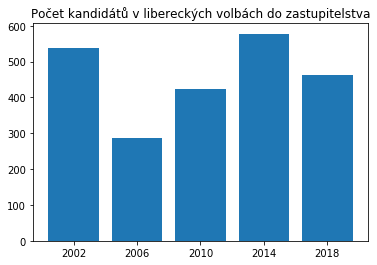

In [260]:
data = data2.groupby(["Rok"]).size()
display(data[data.keys()])
plt.bar(range(len(data)), list(data[data.keys()]), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.title("Počet kandidátů v libereckých volbách do zastupitelstva")
plt.show()

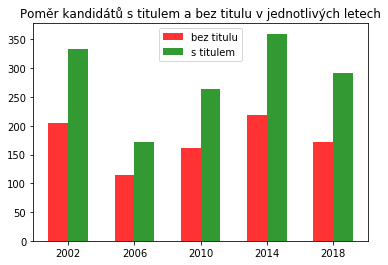

In [302]:
data = pd.read_csv('people_data.csv', na_values=["", "-"])
data["Tituly"] = pd.isna(data2["Tituly"])
data = data.groupby(["Tituly", "Rok"]).size()

bar_width = 0.3
opacity = 0.8
index = np.arange(5)

rects1 = plt.bar(index, data[0], bar_width,
alpha=opacity,
color='r',
label='bez titulu')

rects2 = plt.bar(index + bar_width, data[1], bar_width,
alpha=opacity,
color='g',
label='s titulem')
plt.xticks(index + bar_width/2, range(2002, 2020, 4))
plt.legend()
plt.title("Poměr kandidátů s titulem a bez titulu v jednotlivých letech")
plt.show()